**Recovery of aboveground biomass, species richness and composition in tropical secondary forests in SW Costa Rica**

https://www.researchgate.net/publication/347479124_Recovery_of_aboveground_biomass_species_richness_and_composition_in_tropical_secondary_forests_in_SW_Costa_Rica

In [20]:
# top_n_words - number of top frequent words to consider when scoring sentences
# distance - determine how sentence scores are calculated based on the distance between words
# number_of_sentences - to include in the summary if the percentage parameter is not used

original_sentences, best_sentences, sentences_score = summarize(original_text, 5, 2, 10)

In [ ]:
best_sentences

['The latter may be explained by the presence of V. ferruginea in several forests, which has high growth rates but becomes strongly dominant suppressing competing species in early successional forest.',
 '(For inter\xad pretation of the references to colour in this figure legend, the reader is referred to the web version of this article.)',
 'Older secondary forests were more similar to old- growth forests and as far as a trend was observed between 2015 and 2019, the species composition also became more similar to mature forests within these four years.',
 'Overall, biomass accumulation over time is nearly identical when using the 2015 or the 2019 dataset (black and grey regression lines in Fig.',
 'Site Age (yrs) Previous land-use Lon.',
 'To Fig.',
 'The increase was also slower than reported in other studies.',
 'Similar to AGB, species richness also increased with age, but reached levels similar to OG forests at a slower pace than biomass.',
 'Interestingly, there was a positive ef

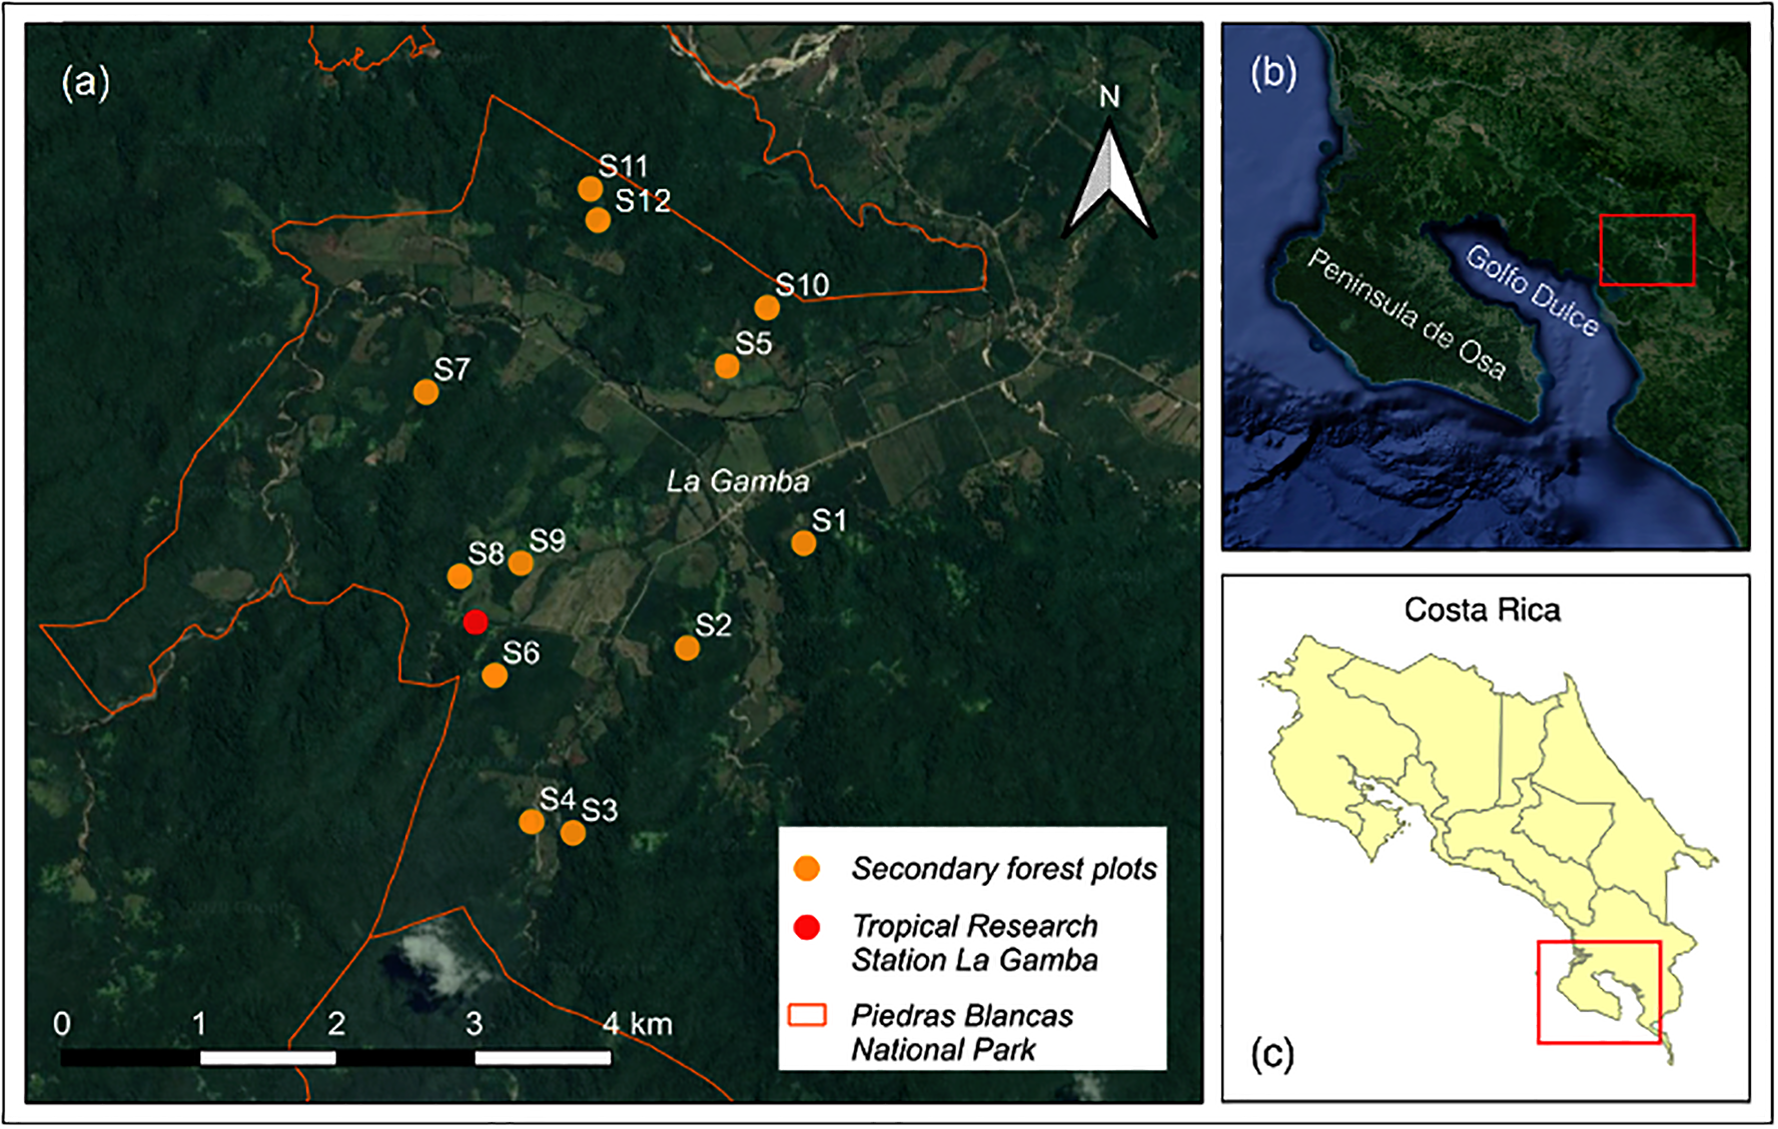

In [ ]:
display(Image('/content/images/3.png'))

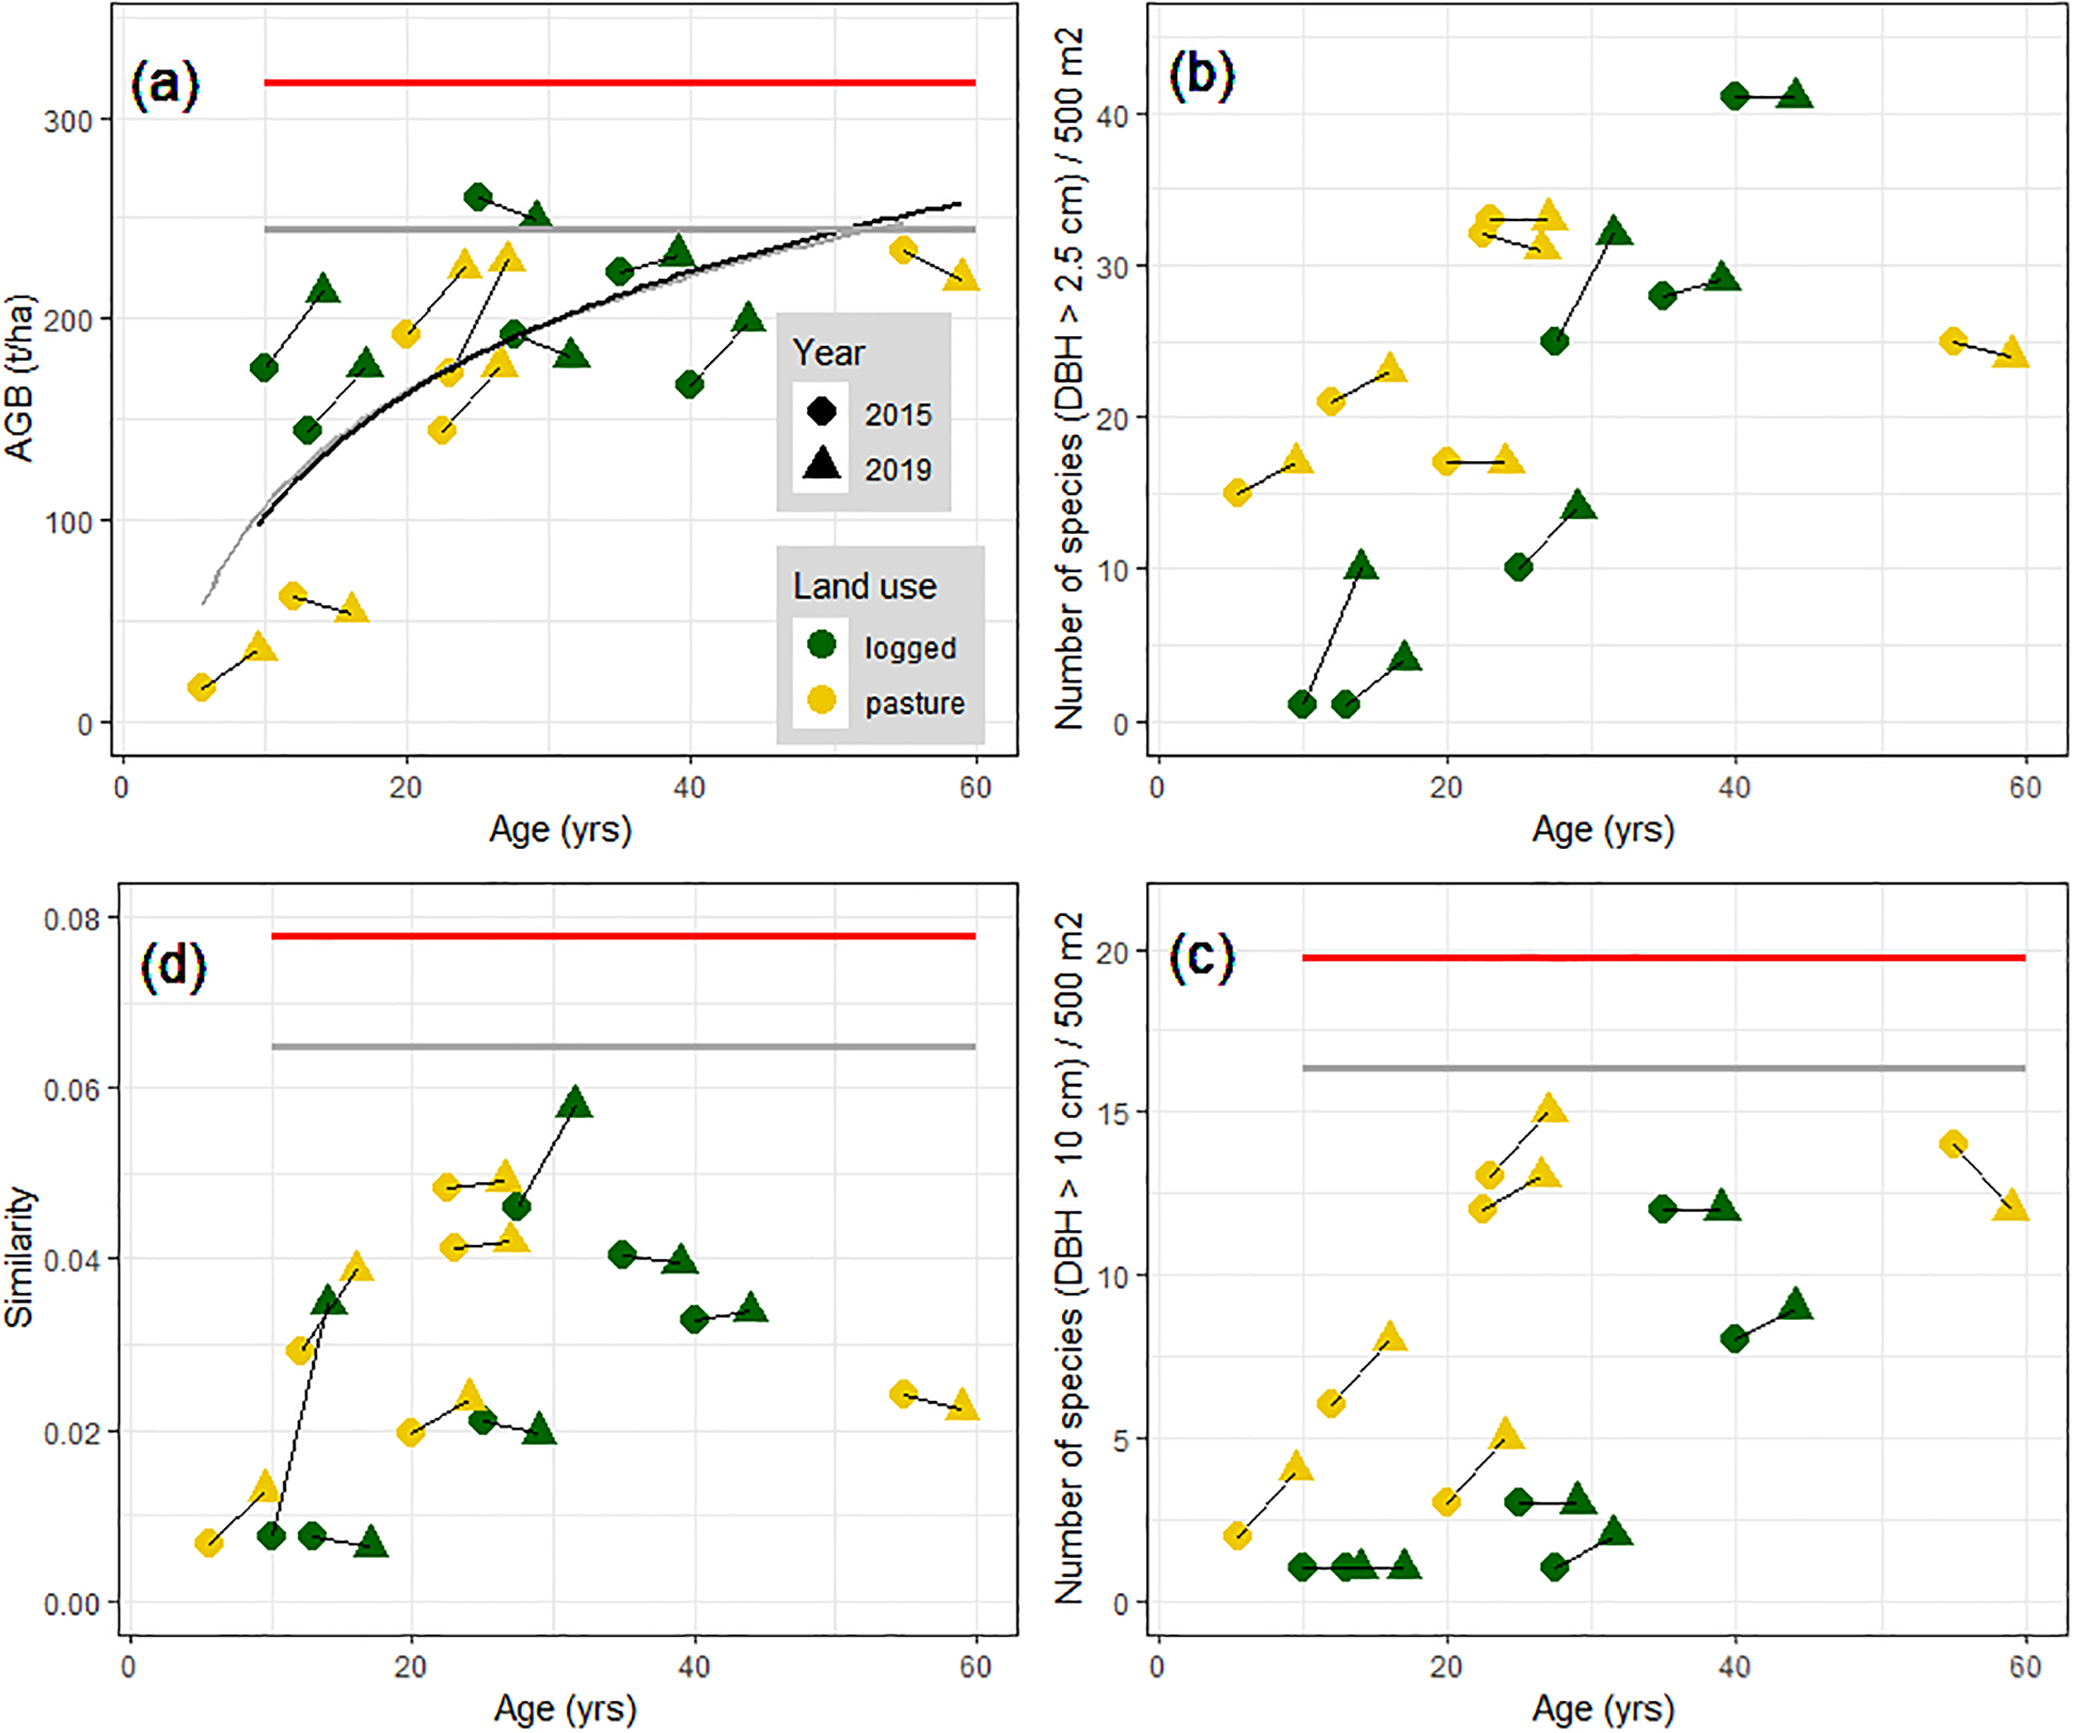

In [ ]:
display(Image('/content/images/4.png'))

In [25]:
def growth_curve(age, A, k, p):
    return A * (1 - np.exp(-k * age))**p

In [28]:
class TreeSpecies:
    def __init__(self, name, age, biomass, initial_guesses):
        self.name = name
        self.age = np.array(age)
        self.biomass = np.array(biomass)
        self.initial_guesses = initial_guesses
        self.params, _ = curve_fit(growth_curve, self.age, self.biomass, self.initial_guesses)
        self.plot()

    def plot(self):
        plt.scatter(self.age, self.biomass, label='data', marker='x', c='r')
        x = np.linspace(1, 210, 210)
        plt.plot(x, growth_curve(x, *self.params), 'b-', label='growth curve')

        plt.title(f'{self.name.upper()} GROWTH CURVE')
        plt.xlabel('Age (years)')
        plt.ylabel('AGB (Mg ha-1)')
        plt.legend()
        plt.xlim(1, 210)
        plt.show()
        print(f'Parameters: {self.params}')

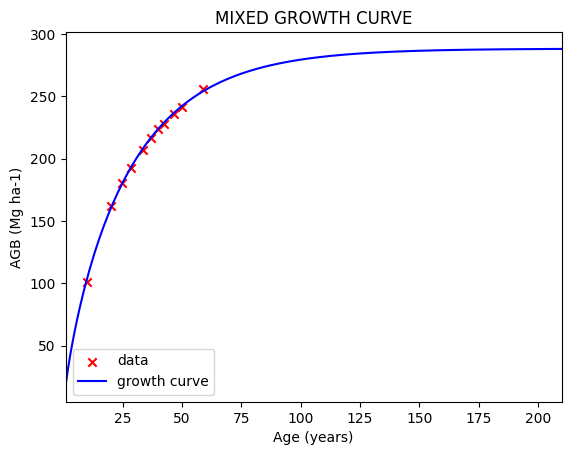

Parameters: [2.88415259e+02 3.26675147e-02 8.01339139e-01]


In [29]:
mixed = TreeSpecies('Mixed',
                         [9.878934624697335, 19.903147699757874, 24.55205811138015, 28.474576271186436, 33.7046004842615, 36.75544794188862, 39.80629539951574, 42.42130750605327, 46.634382566585955, 49.97578692493947, 58.69249394673124],
                         [101.02040816326524,  162.24489795918365,  180.61224489795916,  192.85714285714283,  207.1428571428571,  216.32653061224488,  223.46938775510202,  227.55102040816325,  235.71428571428572,  241.83673469387753,  256.1224489795918],
                         [288.436499030422, 0.0326467164190551, 0.80091517053994])

In [ ]:
table_2 = dataframes[1]
table_2

Site  Age (yrs)  Previous     Lon.   Lat.  Slope (°)   Elevation  \
0   NaN        NaN  land-use      NaN    NaN        NaN  (m.a.s.l.)   
1    S5        5.5   pasture  −83.185  8.718       20.9          80   
2   S11       10.0    logged  −83.194  8.729       13.4         162   
3    S9       12.0   pasture  −83.199  8.705       18.9          88   
4   S12       13.0    logged  −83.194  8.727       19.7         166   
5    S6       20.0   pasture  −83.208  8.916       31.4         116   
6    S4       22.5   pasture  −83.198  8.688       32.1          93   
7    S8       23.0   pasture  −83.203  8.704       29.0         107   
8   S10       25.0    logged  −83.183  8.722       24.4         151   
9    S7       27.5    logged  −83.205  8.716       23.4         119   
10   S3       35.0    logged  −83.195  8.687       29.4         113   
11   S2       40.0    logged  −83.188  8.699       24.3         123   
12   S1       55.0   pasture  −83.180  8.706       36.5         101   

   Forest in 1 km  Sand (%)  Silt (%)   pH     SOC    C/N        CEC  \
0      radius (%)       NaN       NaN  NaN  (mg/g)  ratio  (mmol/kg)   
1              47       8.1      27.4  3.5    25.7    9.5        8.8   
2              85      10.5      43.7  3.7    36.0   11.5       13.1   
3              55       9.3      87.6  3.7    25.0    9.7        7.4   
4              79       5.1      26.9  3.7    40.7   11.5        8.9   
5              56       8.9      50.1  4.0    28.9   10.8       10.6   
6              80      15.3      51.4  4.3    23.6    9.8       24.9   
7              67       5.0      73.4  3.7    22.7   10.4        8.5   
8              70      12.5      37.6  3.7    32.0   10.3       15.2   
9              53       9.7      72.1  3.6    30.2   10.8        7.6   
10             83      19.0      52.4  4.8    40.5   10.4       36.7   
11             47      18.4      65.0  3.7    29.8   10.0       10.5   
12             42      20.6      53.3  4.4    26.4   11.0       28.8   

   Base saturation  
0              (%)  
1             12.5  
2             37.7  
3             21.8  
4              3.7  
5             45.7  
6             76.6  
7             36.8  
8             33.4  
9             28.7  
10            75.3  
11            43.4  
12            61.3

In [ ]:
table_4 = dataframes[3]
table_4

Site  Age (yrs)  Species  >  10 cm DBH  Species  >  2.5 cm DBH BA (m2/  \
0   NaN        NaN                    NaN                     NaN     ha)   
1    S5        5.5                    2.0                    14.0     5.3   
2   NaN        NaN                    NaN                     NaN     NaN   
3   S11       10.0                    1.0                     1.0    29.6   
4    S9       12.0                    5.0                    19.0    11.5   
5   S12       13.0                    1.0                     1.0    26.9   
6    S6       20.0                    3.0                    17.0    25.9   
7   NaN        NaN                    NaN                     NaN     NaN   
8    S4       22.5                    9.0                    31.0    21.4   
9    S8       23.0                   11.0                    32.0    29.8   
10  S10       25.0                    2.0                     9.0    46.7   
11   S7       27.5                    1.0                    24.0    33.7   
12   S3       35.0                    9.0                    27.0    32.1   
13  NaN        NaN                    NaN                     NaN     NaN   
14   S2       40.0                    6.0                    41.0    29.1   
15   S1       55.0                   14.0                    24.0    30.2   

   AGB (Mg/  Height (m) CWM.WSG (g/  \
0       ha)         NaN        cm3)   
1      16.9         6.2       0.357   
2       NaN         NaN         NaN   
3     175.2        23.8       0.326   
4      61.4         7.9       0.514   
5     144.7        21.7       0.326   
6     192.0         9.8       0.514   
7       NaN         NaN         NaN   
8     144.7         9.5       0.482   
9     173.0         9.0       0.387   
10    260.1        11.4       0.378   
11    192.2         8.4       0.342   
12    222.7        10.3       0.434   
13      NaN         NaN         NaN   
14    166.7         9.0       0.387   
15    234.2         9.4       0.450   

                                       dominant trees  
0                                                 NaN  
1          Jacaranda copaia, Alchornea costaricensis,  
2                          Trichospermum grewiifolium  
3                                 Vochysia ferruginea  
4    Miconia affinis, Ficus pertusa, A. costaricensis  
5                                       V. ferruginea  
6    Calophyllum brasiliense, Terminalia amazonia, V.  
7                                          ferruginea  
8   Spondias mombin, Guatteria chiriquiensis, Inga...  
9   V. ferruginea, Guatteria amplifolia, Cecropia sp.  
10         Gmelina arborea, V. ferruginea, M. affinis  
11   V. ferruginea, Psychotria elata, Siparuna andina  
12             G. chiriquiensis, Apeiba membranaceae,  
13                        Tetrathylacium macrophyllum  
14      V. ferruginea, T. macrophyllum, G. amplifolia  
15  Chimarrhis latifolia, G. chiriquiensis, Inga j...